In [1]:
# This notebook contains all functions to input features + class of interest and output plots for heuristic metrics

### Metrics

Let $F$ represent the set of categorical features of all games $G$ in our dataset. Let $C_i$ where $i = \{1,2,3,4,5\}$ be a popularity grade class for any game in $G$. Then,

Importance Score:

$$
I_{i}(F_{j}) = \frac{Number \ of \ games \ with \ feature \ F_j \ in \ C_i}{Total \ number \ of \ games \ in \ C_i}
$$

Relative Importance Score per Feature:

$$
RI_{i}(F_{j}) = \frac{I_{i}(F_{j})}{\sum_{i=1}^5 I_{i}(F_{j})}
$$

Benefit Score:

$$
B_{i}(F_{j}) = \frac{Number \ of \ games \ with \ feature \ F_j \ in \ C_i}{Total \ number \ of \ games \ with \ F_j}
$$

Relative Benefit and Importance Score per Feature:

$$
RBI_{i}(F_{j}) = \frac{B_{i}(F_{j})RI_{i}(F_{j})}{\sum_{i=1}^5 B_{i}(F_{j})RI_{i}(F_{j})} 
$$

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Take Ling's data and drop all columns except the independent categorical variables and
#target variable ("mean"). Also drop all rows with "mean" < 1
data = pd.read_csv('AllData.csv').set_index('Name')
data=data[data['mean']>1]
proc_data=data.drop(['Metacritic','App_id','ReleaseDate','SteamSpyOwners', 'SteamSpyOwnersVariance',
                      'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance', 'PriceCurrency','SupportEmail', 
                      'SupportURL', 'AboutText','Background', 'ShortDescrip', 'DetailedDescrip', 'DRMNotice',
                      'ExtUserAcctNotice', 'HeaderImage', 'LegalNotice', 'Reviews','RecommendationCount',
                      'SupportedLanguages', 'Website', 'PCMinReqsText', 'PCRecReqsText','SteamSpyOwnersNew', 
                      'peak_max','peak_mean', 'max','LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText',
                      'MacRecReqsText','RequiredAge','DemoCount','DLCCount','DeveloperCount','MovieCount',
                      'PackageCount','PublisherCount','ScreenshotCount','AchievementCount',
                      'AchievementHighlightedCount','PriceInitial','PriceFinal'],axis=1)


In [4]:
#This function returns popularity grades based on the mean player count per day
def create_grades(count):

        if 10000<=count:
            return 5
        elif 1000<=count<10000:
            return 4
        elif 100<=count<1000:
            return 3
        elif 10<=count<100:
            return 2
        else:
            return 1

proc_data['grade']=proc_data['mean'].apply(create_grades)

In [5]:
#These functions compute all metrics for feature importance and benefit
def importance_score(df,feat):
    
    score=[]
    
    for grade in df['grade'].unique()[::-1]:
        
        score.append(len(df[(df[feat]==True)&(df['grade']==grade)])/len(df[df['grade']==grade]))
    
    return score

def relative_importance_score(df,feat):
    
    all_scores=importance_score(df,feat)
    
    return [score/sum(all_scores) for score in all_scores]

def benefit_score(df,feat):
    
    score=[]
    
    for grade in proc_data['grade'].unique()[::-1]:
        
        score.append(len(df[(df[feat]==True)&(df['grade']==grade)])/len(df[df[feat]==True]))
    
    return score

def rbi_score(df,feat):
    
    all_biscores=[i*b for i,b in zip(relative_importance_score(df,feat),benefit_score(df,feat))]
    
    return [biscore/sum(all_biscores) for biscore in all_biscores]

In [6]:
#This function plots a 4 bar graphs for all scores, given the features and popularity grade
def plot_scores(feats,grade,nscores=4):
    
    index=proc_data['grade'].unique()[::-1]
    matrices=[pd.DataFrame(index=index) for _ in range(nscores)]

    for feat in feats:
        matrices[0][feat]=importance_score(proc_data,feat)
        matrices[1][feat]=relative_importance_score(proc_data,feat)
        matrices[2][feat]=benefit_score(proc_data,feat)
        matrices[3][feat]=rbi_score(proc_data,feat)
    
    fig, ax = plt.subplots(nrows=4,ncols=1,figsize=(10,15),sharex=True)
    plt.rcParams['axes.grid'] = True
    fontsize=24
    colors=['b','g','y','r']
    score_names=["Importance","Rel. Importance","Benefit","RBI"]

    all_scores=[scores.iloc[grade-1] for scores in matrices]
    ax[0].set_title('Grade '+str(grade),fontsize=fontsize)
    for i in range(4):
        all_scores[i].plot.bar(ax=ax[i], alpha=0.6,color=colors[i])
        ax[i].set_ylabel(score_names[i],fontsize=fontsize)

    plt.xticks(fontsize=fontsize,rotation=45)
    fig.tight_layout()
    plt.show()
     

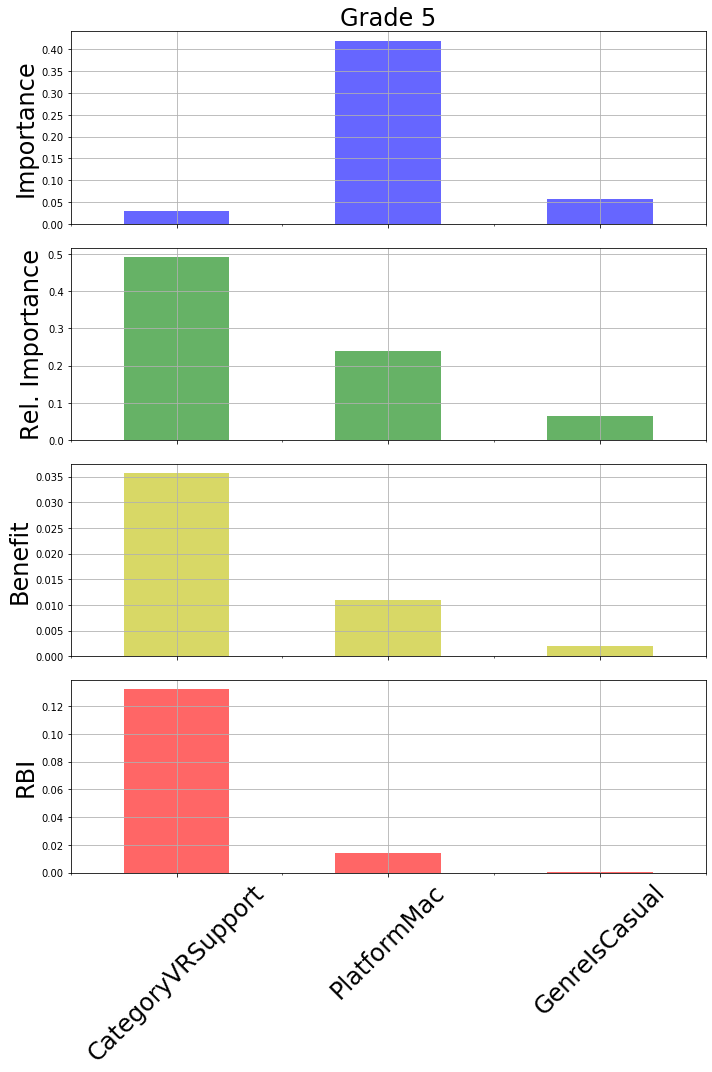

In [7]:
#Here is an example to run this code:
feats=['CategoryVRSupport','PlatformMac','GenreIsCasual']
grade_choice=5
plot_scores(feats=feats,grade=grade_choice)